In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#remove a duplicate in a list
a=[1,2,4,6,7,8,1,3,4]
def remove_duplicates(values):
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output
print(remove_duplicates(a))

[1, 2, 4, 6, 7, 8, 3]


In [3]:
 #remove a duplicate in a list
np.unique(a)

array([1, 2, 3, 4, 6, 7, 8])

In [4]:
#drop duplicates in a data frame
a=np.array([[1,1,2],[1,3,3],[5,6,6]])
b=pd.DataFrame(a,columns=list('ABC'))
print b
print b.drop_duplicates(subset='A', keep="first")

   A  B  C
0  1  1  2
1  1  3  3
2  5  6  6
   A  B  C
0  1  1  2
2  5  6  6


You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 


In [5]:
#python
requested_accepted=pd.DataFrame(
    {'time':['5/17/2017','5/18/2017','5/20/2017'],
     'accepter_id':['10001','10002','1003'],
     'requester_id':['1003', '1002','1005']
})
friend_reqested=pd.DataFrame(
    {'time':['4/17/2017','4/18/2017','4/19/2017','4/21/2017','4/23/2017'],
     'sent_to_id':['1','2','3','4','5'],
     'requester_id':['1001', '1002','1003','1004','1005']
})
len(np.unique(requested_accepted['requester_id']))/float(len(np.unique(friend_reqested['requester_id'])))


0.6

In [6]:
#using SQL 
%load_ext sql
%sql sqlite://

'Connected: None@None'

In [7]:
%%sql
Create Table requested_accepted(time varchar(10), 
                                accepter_id varchart(10), 
                                requester_id varchart (10));

Done.


[]

In [8]:
%%sql
Insert into requested_accepted Values('5/17/2017','10001','1003');
Insert into requested_accepted Values('5/18/2017','10002','1002');
Insert into requested_accepted Values('5/20/2017','10003','1005');

1 rows affected.
1 rows affected.
1 rows affected.


[]

In [9]:
%sql select * from requested_accepted

Done.


time,accepter_id,requester_id
5/17/2017,10001,1003
5/18/2017,10002,1002
5/20/2017,10003,1005


In [10]:
%%sql
Create Table friend_reqested (time varchar(10), 
                                sent_to_id varchart(10), 
                                requester_id varchart (10));

Done.


[]

In [11]:
%%sql
Insert into friend_reqested Values('4/17/2017','1','1001');
Insert into friend_reqested Values('4/18/2017','2','1002');
Insert into friend_reqested Values('4/19/2017','3','1003');
Insert into friend_reqested Values('4/21/2017','4','1004');
Insert into friend_reqested Values('4/23/2017','5','1005');

1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [12]:
%sql select * from friend_reqested

Done.


time,sent_to_id,requester_id
4/17/2017,1,1001
4/18/2017,2,1002
4/19/2017,3,1003
4/21/2017,4,1004
4/23/2017,5,1005


In [13]:
%%sql
select CAST(count(distinct R.requester_id) AS FLOAT)/count(distinct F.requester_id) as accptedrate
from friend_reqested F
left join requested_accepted R
on F.requester_id=R.requester_id

Done.


accptedrate
0.6


Do some research and summarize the business model of your dream company, or company that you interview with.
What is the product
Who are the customer
How do they make money
Why do you want to work for this company?


1.My dream company is paypal, the product is paypal, a worldwide online payment system.
2.The target customer is every single person and small business.
3.Two ways Paypal can make money: one way is charing to a payment recipient, another way is earning interest against the money that you have sitting in your account.
4.Paypal is the largest company in online payment industry. I am the loyal customer of Paypal. paypal can provide the most safe and easiest way to transfer money, which benefit to our life. 

In [14]:
import datetime
df=pd.read_csv('BA501_python_data.csv')
#df.date=np.datetime64[D](df.date )
df.date=pd.to_datetime(df.date, format='%Y%m%d')
df.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [15]:
sum(df['spend_usd'][df.experiment_id==12624548])

397069.86045892676

In [16]:
sum(df['spend_usd'][df.experiment_id==12624549])

395487.78414993605

In [17]:
df.head(5)
np.unique(df.vertical)

array(['ANDROID_APPS', 'COMMERCE', 'MAGAZINES', 'MULTI_CONTAINER', 'MUSIC',
       'OCEAN', 'YOUTUBE'], dtype=object)

In [18]:
a=df.experiment_id
np.unique(a)

array([12624548, 12624549])

In [19]:
print np.unique(df.date)

['2017-04-01T00:00:00.000000000' '2017-04-02T00:00:00.000000000'
 '2017-04-03T00:00:00.000000000' '2017-04-04T00:00:00.000000000'
 '2017-04-05T00:00:00.000000000' '2017-04-06T00:00:00.000000000'
 '2017-04-07T00:00:00.000000000']


In [20]:
def GetSeries(df, my_id):
    table = df[["date", "spend_usd"]][df.experiment_id == my_id]
    series =np.cumsum(table.groupby(['date'])['spend_usd'].sum())
    return(series)


In [21]:
red = GetSeries(df, 12624548)
blue = GetSeries(df, 12624549)
print (red)

date
2017-04-01     84017.341822
2017-04-02    137448.866601
2017-04-03    190557.548939
2017-04-04    236190.035518
2017-04-05    287575.193811
2017-04-06    334991.572625
2017-04-07    397069.860459
Name: spend_usd, dtype: float64


In [22]:
print blue

date
2017-04-01     79698.149014
2017-04-02    135650.086580
2017-04-03    183489.384696
2017-04-04    229006.213561
2017-04-05    283314.758617
2017-04-06    337204.699429
2017-04-07    395487.784150
Name: spend_usd, dtype: float64


In [23]:
index_series = red.index
print index_series

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07'],
              dtype='datetime64[ns]', name=u'date', freq=None)


In [24]:
def PlotSeries(index_series, experiment_series, control_series):
    df1 = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series, # a range of dates
        columns = ["experiment", "control"]
    )
    df1.plot()
    

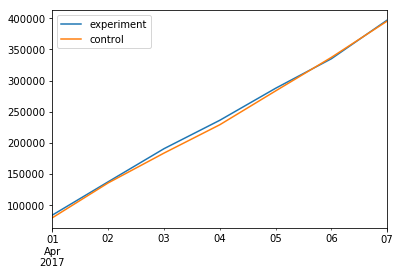

In [25]:

# test if this works
date_series = df.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)

In [26]:
#date_series = df.date
#index_series = np.unique(date_series) # unique date
#index_series = np.sort(index_series) # sort by date
#print index_series

In [27]:
def PrintCumulativeTimeSeries(df,experiment_ids):
    #date_series = df.date
    #index_series = np.unique(date_series) # unique date
    #index_series = np.sort(index_series) # sort by date
    
    # data grouping
    #mdf = df.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(df, experiment_ids[0])
    control_series = GetSeries(df, experiment_ids[1])
    
    PlotSeries(index_series, treatment_series, control_series)

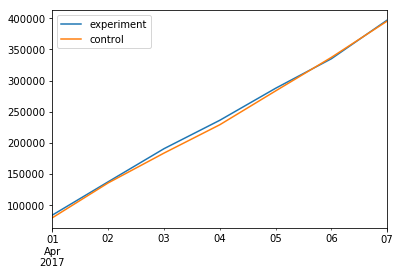

In [28]:

PrintCumulativeTimeSeries(df,[12624548,12624549])